The optimal Gamma value is 2.53020202020202


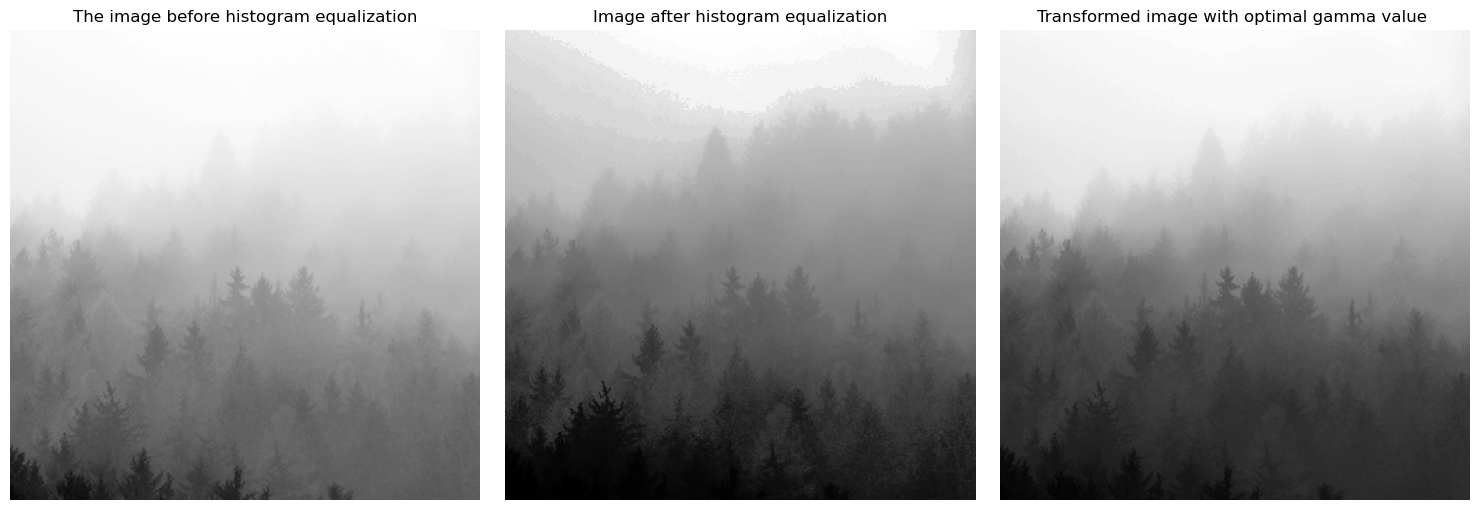

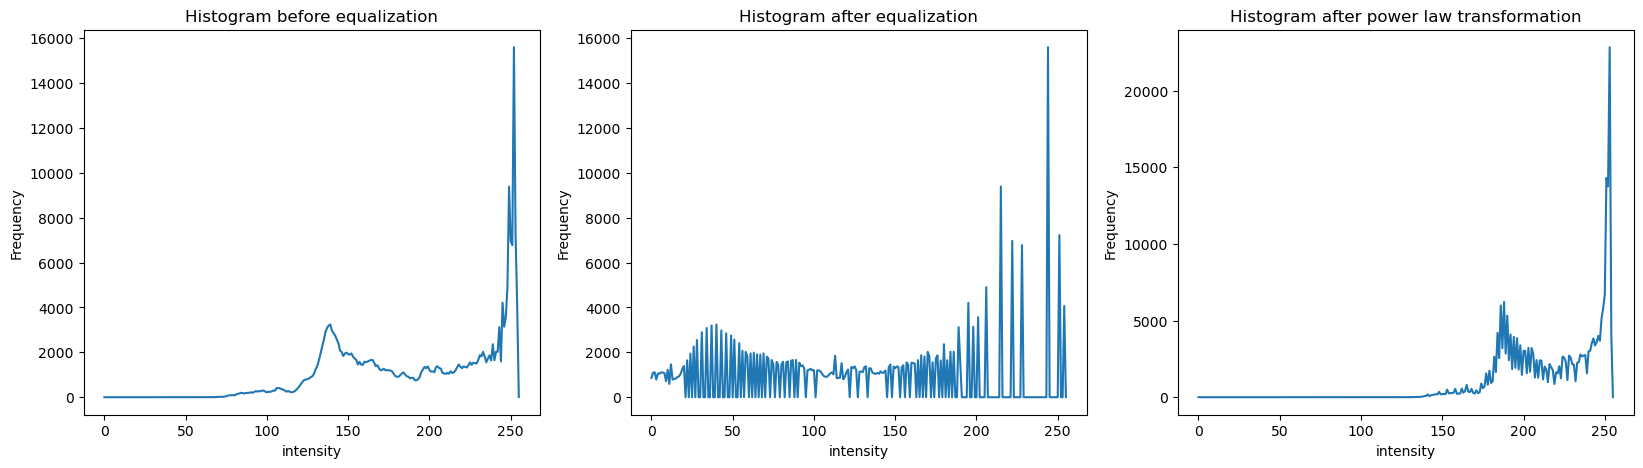

In [29]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from pathlib import Path
import cv2


def Histogram_func(image):
    height,column = image.shape
    hist = [0] * 256
    for i in range(height) :
        for j in range(column) :
            a = int(image[i][j])
            hist[a] = hist[a] + 1
            
    cdf = np.cumsum(hist)
    cdf_normalized = ((cdf - cdf.min()) / (cdf.max() - cdf.min()) * 255).astype('uint8')

    # Apply equalization to the image
    equalized_img = cdf_normalized[image]
    
    return equalized_img

def power_law_transform_custom(img, gamma):
    # Apply gamma correction
    gamma_corrected = ((img / 255.0) ** gamma) * 255.0

    return gamma_corrected.astype('uint8')

def best_gamma(image):
    
    eq_image = Histogram_func(image)
    best_gamma_custom = None
    min_mse_custom = float('inf')

    for gamma in np.linspace(0.01, 5.0, 100):
        gamma_corrected_custom = power_law_transform_custom(image, gamma)
        mse = np.mean((gamma_corrected_custom - eq_image) ** 2)
        if mse < min_mse_custom:
            min_mse_custom = mse
            best_gamma_custom = gamma
    
    return best_gamma_custom

def images(image,best_gamma_custom):
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,3,1)
    plt.title("The image before histogram equalization")
    plt.imshow(image,cmap='gray')
    plt.axis('off')

    eq_image = Histogram_func(image)
    plt.subplot(1,3,2)
    plt.title("Image after histogram equalization")
    plt.imshow(eq_image,cmap='gray')
    plt.axis('off')
    
    print("The optimal Gamma value is",best_gamma_custom)
    plt.subplot(1,3,3)
    plt.title("Transformed image with optimal gamma value ")
    plt.imshow(power_law_transform_custom(image, best_gamma_custom),cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    

def plot_histograms(image):
    plt.figure(figsize=(20,5))
    
    plt.subplot(1,3,1)
    plt.title('Histogram before equalization')
    plt.plot(cv2.calcHist([image], [0], None, [256], [0, 256]))
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    
    eq_image = Histogram_func(image)
    plt.subplot(1,3,2)
    plt.title('Histogram after equalization')
    plt.plot(cv2.calcHist([eq_image], [0], None, [256], [0, 256]))
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(1,3,3)
    plt.title('Histogram after power law transformation')
    plt.plot(cv2.calcHist([power_law_transform_custom(image,.50)], [0], None, [256], [0, 256]))
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.show()


    
def main():
    image_path = 'hazy.png'
    image = skimage.io.imread(image_path)
    best_gamma_custom = best_gamma(image)
    images(image,best_gamma_custom)
    
    plot_histograms(image)
    
    return 1

if __name__ == '__main__':
    main()
